In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [3]:
df = pd.read_csv(r'D:\2024\data science portfolio\data\BCG\PowerCO/data_for_predictions.csv')

In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [7]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [10]:
rf = RandomForestClassifier(random_state=42)

In [11]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
'n_estimators': [100, 200, 300],
'max_features': ['sqrt', 'log2'],
'max_depth': [10, 20, 30, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'bootstrap': [True, False]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [13]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [14]:
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, random_state=42)

In [15]:
# Making predictions
y_pred = best_rf.predict(X_test)

In [23]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

In [25]:
y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

In [24]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

True positives: 22
False positives: 6
True negatives: 3280
False negatives: 344

Accuracy: 0.9041621029572837
Precision: 0.7857142857142857
Recall: 0.060109289617486336


- Looking at the true negatives, we have 3280 out of 3286. This means that out of all the negative cases (churn = 0), we predicted 3280 as negative (hence the name True negative). This is great!

- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 344, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.

- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 6 cases, which is great!

- With the true positives, we can see that in total we have 366 clients that churned in the test dataset. However, we are only able to correctly identify 22 of those 366, which is very poor.

- Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.

- Looking at the precision score, this shows us a score of 0.82 which is not bad, but could be improved.

- However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners. 


In [16]:
# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3286
           1       0.79      0.06      0.11       366

    accuracy                           0.90      3652
   macro avg       0.85      0.53      0.53      3652
weighted avg       0.89      0.90      0.87      3652

Accuracy: 0.9041621029572837


In [18]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': best_rf.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

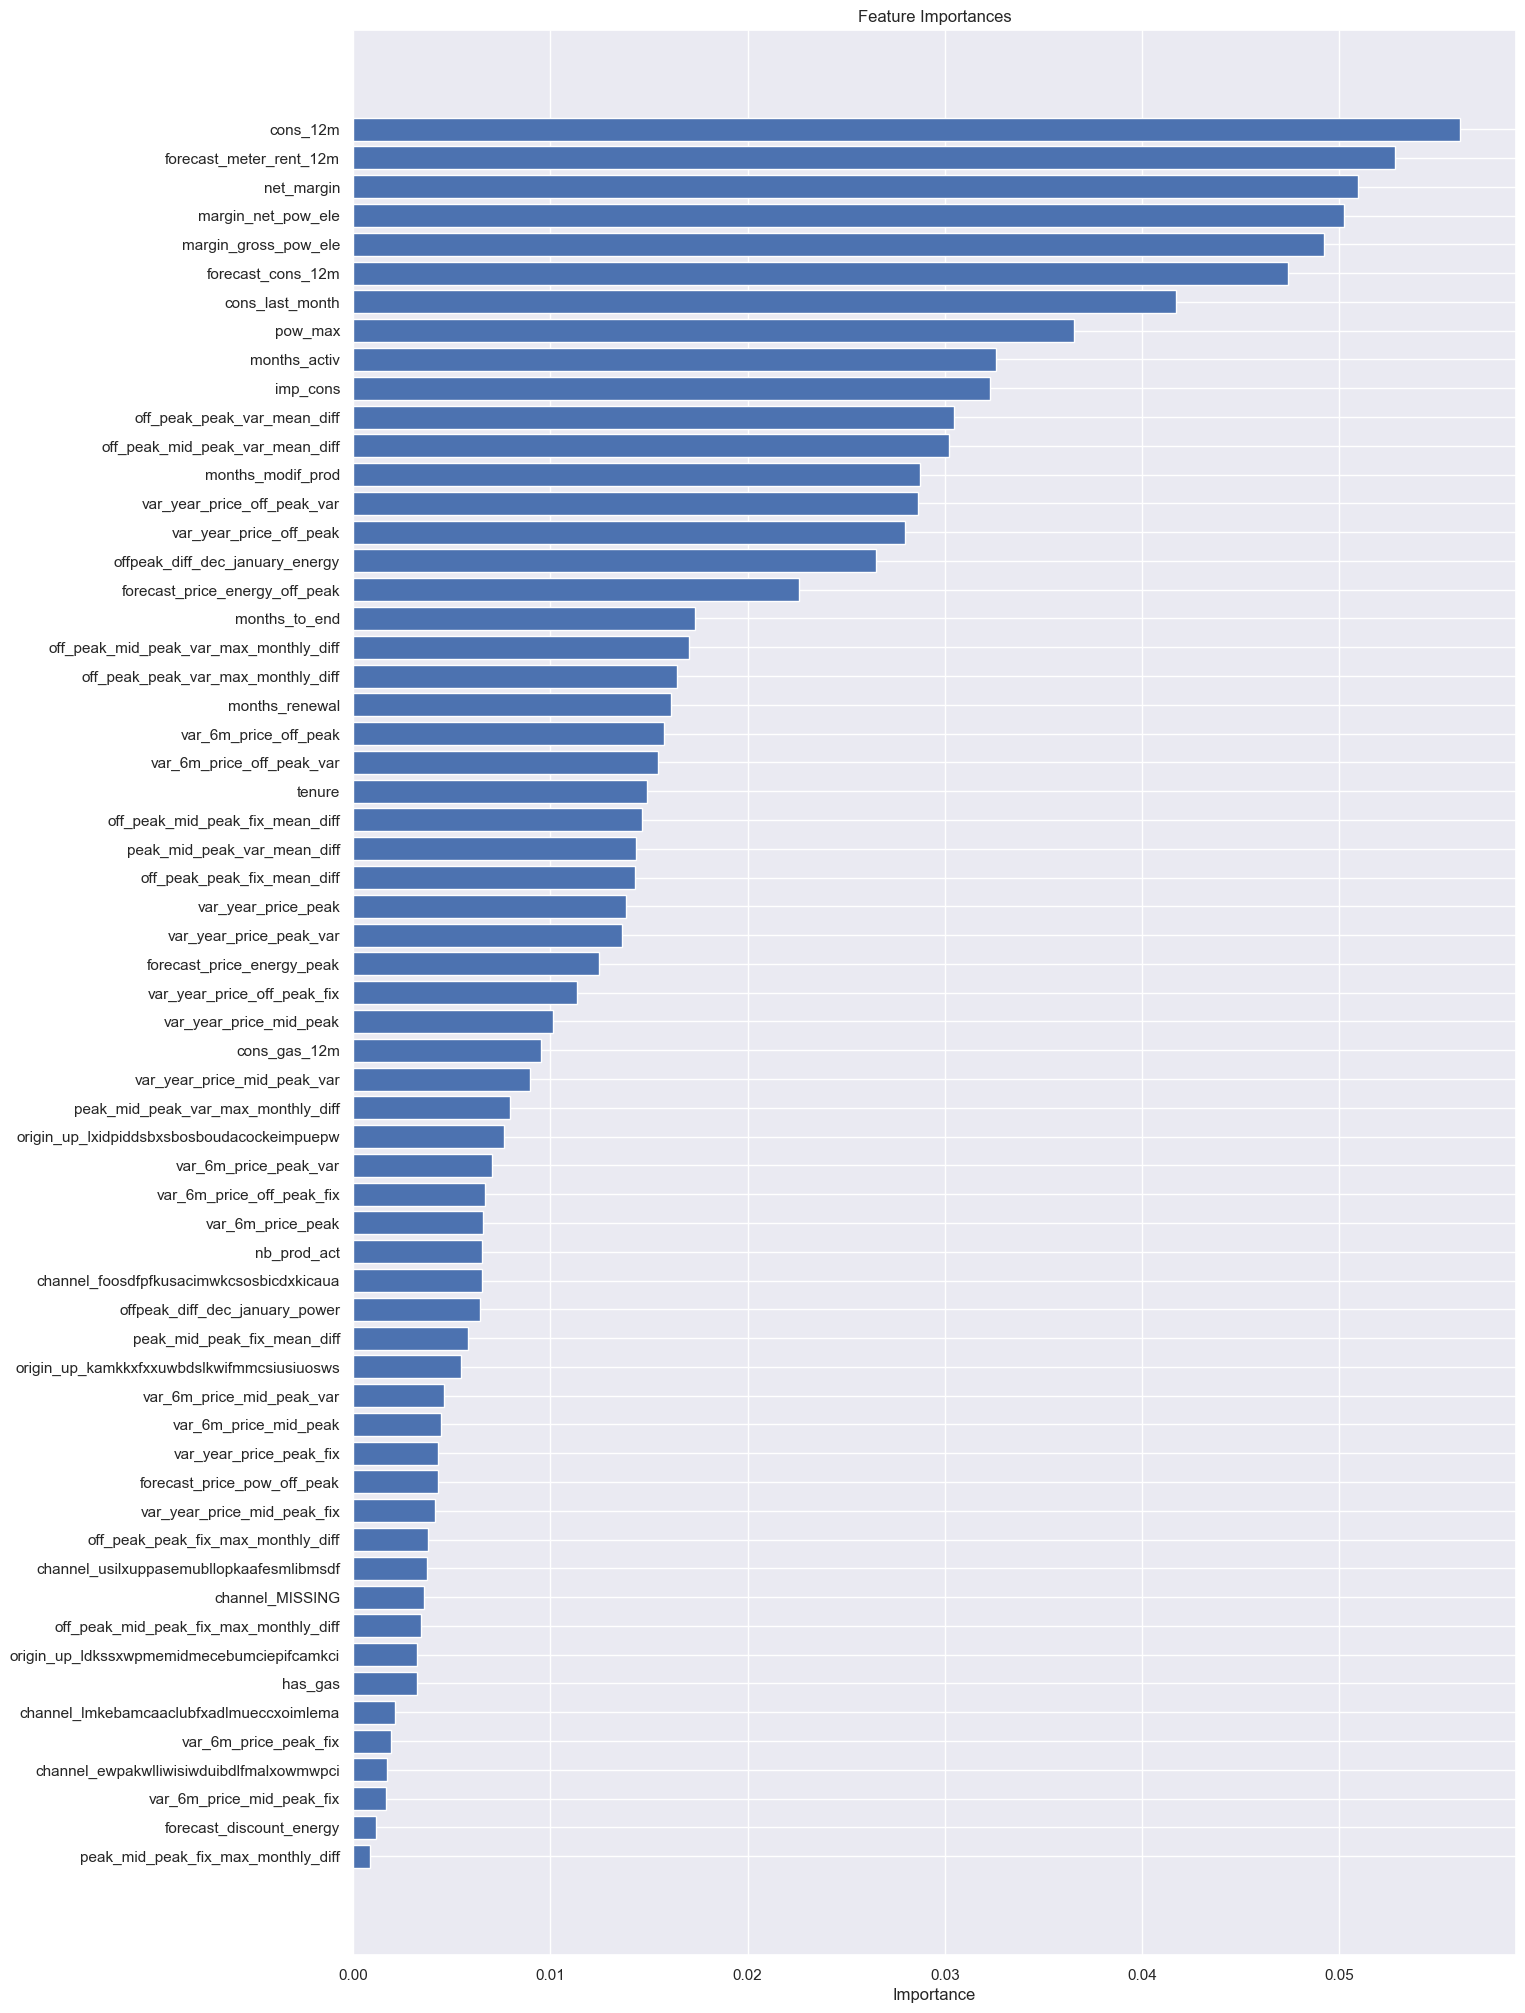

In [19]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

The last observation is important because this relates back to our original hypothesis:

    > Is churn driven by the customers' price sensitivity?

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [20]:
proba_predictions = best_rf.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [21]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [22]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')